In [85]:
# Plan of Attack

In [86]:
# SR
## Finish EDA and Preprocessing Pickle File and Steps
## Gensim // Spacy pretrained models

In [ ]:
# NG
## Gridsearching - Prep

In [2]:
# remove words of size 2

In [1]:
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

In [2]:
from Functions import *

In [3]:
#
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

import re

In [4]:
df = pd.read_csv(r'train.csv')

In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df['text'].duplicated().sum()

110

In [7]:
df.loc[df['text'].duplicated()].head(50)

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
630,907,bioterrorism,NaN,To fight bioterrorism sir.,1
634,916,bioterrorism,NaN,To fight bioterrorism sir.,0
1156,1665,bombing,Singapore,Japan on Thursday marks the 70th anniversary o...,1
1251,1807,buildings%20on%20fire,UK,#TweetLikeItsSeptember11th2001 Those two build...,1
1331,1922,burning%20buildings,"Mackay, QLD, Australia",Mmmmmm I'm burning.... I'm burning buildings I...,0


In [8]:
df.drop(['id','keyword','location'],axis=1, inplace=True)

In [9]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
def preprocessor(dataframe):
    pass

In [11]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

# Tweet Tokenizer


In [12]:
tweeter = TweetTokenizer(strip_handles=True,reduce_len=True, preserve_case=False)

In [13]:
df['tweets'] = df['text'].apply(lambda text: tweeter.tokenize(text))

In [14]:
df['tweets']

0       [our, deeds, are, the, reason, of, this, #eart...
1        [forest, fire, near, la, ronge, sask, ., canada]
2       [all, residents, asked, to, ', shelter, in, pl...
3       [13,000, people, receive, #wildfires, evacuati...
4       [just, got, sent, this, photo, from, ruby, #al...
                              ...                        
7608    [two, giant, cranes, holding, a, bridge, colla...
7609    [the, out, of, control, wild, fires, in, calif...
7610    [m1, ., 94, [, 01:04, utc, ], ?, 5km, s, of, v...
7611    [police, investigating, after, an, e-bike, col...
7612    [the, latest, :, more, homes, razed, by, north...
Name: tweets, Length: 7613, dtype: object

In [15]:
lemma = WordNetLemmatizer()

In [16]:
def lemmatizing(sentence_array):
    lemmas = nltk.pos_tag(sentence_array)
    container = []
    for word,lem in lemmas:
        pos = get_wordnet_pos(lem)
        if pos:
            container.append(lemma.lemmatize(word,pos=pos))
        else:
            container.append(lemma.lemmatize(word))
    return container

In [17]:
df['lemmed'] = df['tweets'].apply(lambda array: lemmatizing(array))

In [18]:
df['lemmed']

0       [our, deed, be, the, reason, of, this, #earthq...
1        [forest, fire, near, la, ronge, sask, ., canada]
2       [all, resident, ask, to, ', shelter, in, place...
3       [13,000, people, receive, #wildfires, evacuati...
4       [just, get, send, this, photo, from, ruby, #al...
                              ...                        
7608    [two, giant, crane, hold, a, bridge, collapse,...
7609    [the, out, of, control, wild, fire, in, califo...
7610    [m1, ., 94, [, 01:04, utc, ], ?, 5km, s, of, v...
7611    [police, investigate, after, an, e-bike, colli...
7612    [the, late, :, more, home, raze, by, northern,...
Name: lemmed, Length: 7613, dtype: object

In [19]:
def cleaner(sentence_array):
    sentence = " ".join(sentence_array)
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = re.sub('[()!?]', ' ', sentence)
    sentence = re.sub('[()!?]', ' ', sentence)
    sentence = re.sub('\[.*?\]',' ', sentence)
    sentence = re.sub("[^a-z0-9]"," ", sentence)
    sentence = re.sub(r'\b\w{1,3}\b', '', sentence)
    sentence = [w for w in sentence.split() if not w in stopwords.words('english')]

    return " ".join(sentence)
        

In [20]:
df['cleaned'] = df['lemmed'].apply(lambda array: cleaner(array))

In [21]:
df['cleaned']

0                    deed reason earthquake allah forgive
1                      forest fire near ronge sask canada
2       resident shelter place notify officer evacuati...
3       people receive wildfires evacuation order cali...
4       send photo ruby alaska smoke wildfires pour sc...
                              ...                        
7608         giant crane hold bridge collapse nearby home
7609    control wild fire california even northern par...
7610                                       volcano hawaii
7611    police investigate bike collided little portug...
7612     late home raze northern california wildfire news
Name: cleaned, Length: 7613, dtype: object

In [22]:
df['cleaned'].isna().sum()

0

# Machine learning

In [23]:
from sklearn.model_selection import train_test_split

#reminder to build preprocessor function and insert in the vectorizers instead of using the default
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#XGBClassifier
#Decision Trees
#Reg NN
#LSTM

from keras import models, layers, optimizers

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'],df['target'],test_size = .2, random_state = 42)

## CountVectorizer

In [25]:
counter = CountVectorizer()

In [26]:
counted_vect = counter.fit_transform(X_train)

In [27]:
counted_vect.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
counted_df = pd.DataFrame(data=counted_vect.todense(),columns=counter.get_feature_names())

In [29]:
counted_df

,00pm,066gp,06jst,0853,08780923344,0880,0fsloths,0npzp,0sed,1000,...,zipper,zippoline,zl1ns2i,zmne,zombie,zombiefunrun2014,zone,zonewolf,zouma,zumiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train_c = counter.transform(X_train)
X_test_c = counter.transform(X_test)

In [31]:
log = LogisticRegression()
log.fit(X_train_c,y_train)

LogisticRegression()

In [32]:
log.score(X_test_c,y_test)

0.788575180564675

In [33]:
log = LogisticRegression()

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3468
           1       0.97      0.89      0.93      2622

    accuracy                           0.94      6090
   macro avg       0.95      0.94      0.94      6090
weighted avg       0.94      0.94      0.94      6090

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.78      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

********************************************************



LogisticRegression()

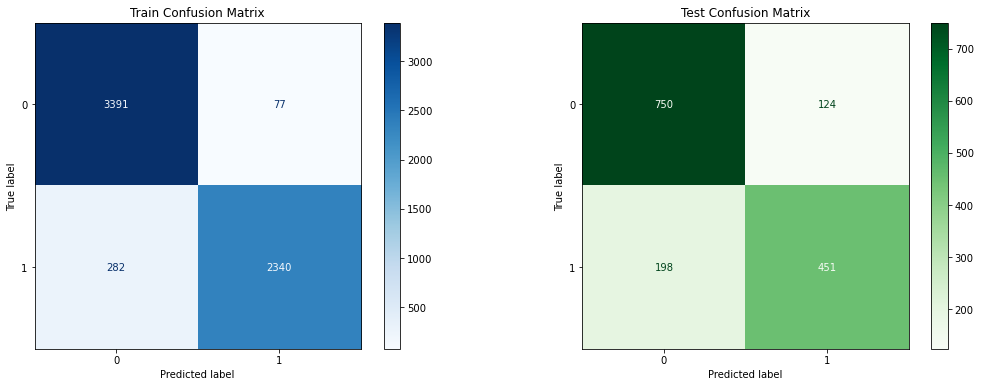

In [34]:
run_class_model(log, X_train_c, y_train, X_test_c, y_test)

## TFidf Vectorizer

In [35]:
tfidf = TfidfVectorizer()
tf_vect = tfidf.fit_transform(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [36]:
logtf = LogisticRegression()
logtf.fit(X_train_tf,y_train)

LogisticRegression()

In [37]:
logtf.score(X_test_tf,y_test)

0.7898883782009193

In [38]:
logtf = LogisticRegression()

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3468
           1       0.93      0.77      0.84      2622

    accuracy                           0.88      6090
   macro avg       0.89      0.86      0.87      6090
weighted avg       0.88      0.88      0.87      6090

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       874
           1       0.80      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

********************************************************



LogisticRegression()

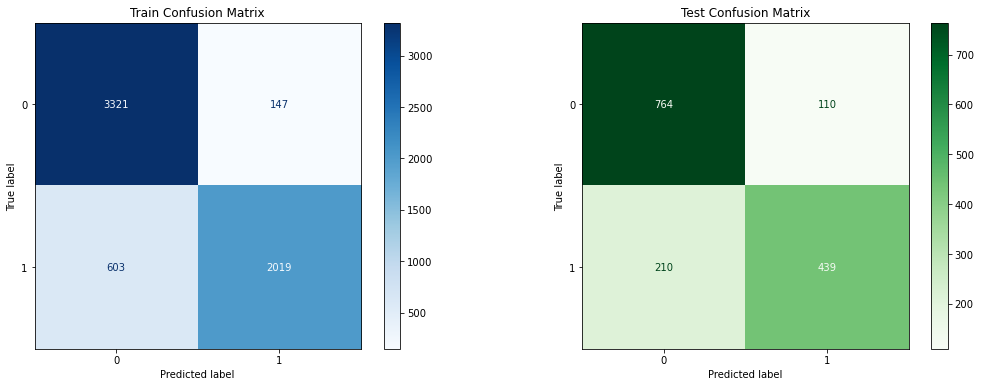

In [39]:
run_class_model(logtf, X_train_tf, y_train, X_test_tf, y_test)

### TFIDF part 2

In [40]:
tfidf2 = TfidfVectorizer(max_features=1000,ngram_range=(1,3) )
tf_vect2 = tfidf2.fit_transform(X_train)
X_train_tf2 = tfidf2.transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

In [41]:
log_tf2 = LogisticRegression()

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3468
           1       0.84      0.73      0.78      2622

    accuracy                           0.82      6090
   macro avg       0.83      0.81      0.82      6090
weighted avg       0.83      0.82      0.82      6090

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       874
           1       0.75      0.68      0.71       649

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.76      1523

********************************************************



LogisticRegression()

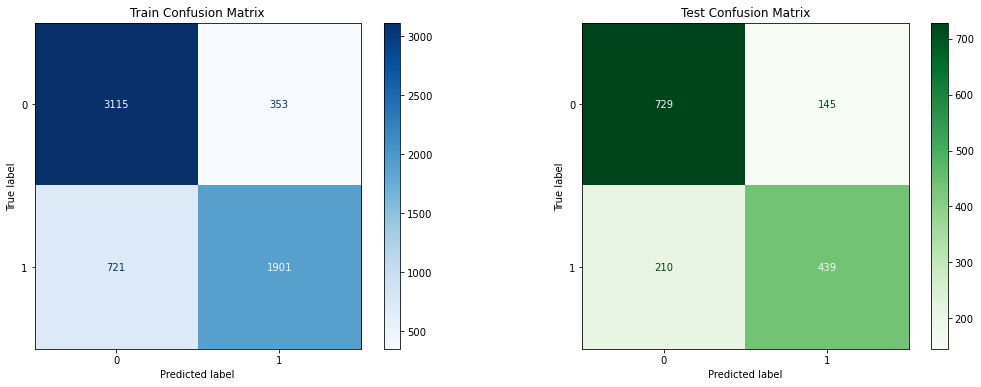

In [42]:
run_class_model(log_tf2,X_train_tf2,y_train,X_test_tf2,y_test)

# Machine Learning Classifiers

In [ ]:
X_train_c, y_train, X_test_c, y_test

In [52]:
model2 = Sequential()
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
history2 = model2.fit(X_train_c.todense(),y_train,epochs=10, validation_data=[X_test_c.todense(),y_test])

Epoch 1/10
191/191 [==============================] - 1s 6ms/step - loss: 0.5362 - accuracy: 0.7539 - val_loss: 0.4615 - val_accuracy: 0.7886
Epoch 2/10
191/191 [==============================] - 1s 5ms/step - loss: 0.2813 - accuracy: 0.8910 - val_loss: 0.5005 - val_accuracy: 0.7814
Epoch 3/10
191/191 [==============================] - 1s 5ms/step - loss: 0.1527 - accuracy: 0.9440 - val_loss: 0.5981 - val_accuracy: 0.7761
Epoch 4/10
191/191 [==============================] - 1s 5ms/step - loss: 0.0968 - accuracy: 0.9639 - val_loss: 0.7246 - val_accuracy: 0.7722
Epoch 5/10
191/191 [==============================] - 1s 5ms/step - loss: 0.0707 - accuracy: 0.9737 - val_loss: 0.8149 - val_accuracy: 0.7597
Epoch 6/10
191/191 [==============================] - 1s 5ms/step - loss: 0.0584 - accuracy: 0.9744 - val_loss: 0.8972 - val_accuracy: 0.7590
Epoch 7/10
191/191 [==============================] - 1s 5ms/step - loss: 0.0498 - accuracy: 0.9796 - val_loss: 0.9776 - val_accuracy: 0.7590
Epoch 

# Importing Test Set

In [35]:
test_df = pd.read_csv(r'nlp-getting-started/test.csv')

In [36]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# answers

In [37]:
df

,text,target,tweets,lemmed,cleaned
0,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, #eart...","[our, deed, be, the, reason, of, this, #earthq...",deed reason earthquake allah forgive
1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]",forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, ', shelter, in, pl...","[all, resident, ask, to, ', shelter, in, place...",resident shelter place notify officer evacuati...
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...","[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation order cali...
4,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, #al...","[just, get, send, this, photo, from, ruby, #al...",send photo ruby alaska smoke wildfires pour sc...
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[two, giant, cranes, holding, a, bridge, colla...","[two, giant, crane, hold, a, bridge, collapse,...",giant crane hold bridge collapse nearby home
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[the, out, of, control, wild, fires, in, calif...","[the, out, of, control, wild, fire, in, califo...",control wild fire california even northern par...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[m1, ., 94, [, 01:04, utc, ], ?, 5km, s, of, v...","[m1, ., 94, [, 01:04, utc, ], ?, 5km, s, of, v...",volcano hawaii
7611,Police investigating after an e-bike collided ...,1,"[police, investigating, after, an, e-bike, col...","[police, investigate, after, an, e-bike, colli...",police investigate bike collided little portug...


In [70]:
sample_vect = CountVectorizer()

In [71]:
doc1 = "This is a dog"
doc2 = "This is a cat"
doc3 = "The cat and the dog dont like the other cat"

In [72]:
sample_df = pd.DataFrame([doc1,doc2,doc3],columns=["text"])

In [73]:
sample_df

,text
0,This is a dog
1,This is a cat
2,The cat and the dog dont like the other cat


In [74]:
vecc = sample_vect.fit_transform(sample_df['text'])

In [75]:
vecc.todense()

matrix([[0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 1, 0, 0, 0, 1],
        [1, 2, 1, 1, 0, 1, 1, 3, 0]], dtype=int64)

In [76]:
output = pd.DataFrame(vecc.todense(), columns = sample_vect.get_feature_names())

In [77]:
output

,and,cat,dog,dont,is,like,other,the,this
0,0,0,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1
2,1,2,1,1,0,1,1,3,0


In [78]:
print(doc1)
print(doc2)
print(doc3)

This is a dog
This is a cat
The cat and the dog dont like the other cat


In [84]:
samptf = TfidfVectorizer(ngram_range=[1,2],max_features=10)
fit_tf = samptf.fit_transform(sample_df['text'])
tf_df = pd.DataFrame(fit_tf.todense(),columns=samptf.get_feature_names())
tf_df

,cat,dog,is,other cat,the,the cat,the dog,the other,this,this is
0,0.000000,0.500000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.5
1,0.500000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.5
2,0.381553,0.190776,0.0,0.250848,0.752544,0.250848,0.250848,0.250848,0.0,0.0


In [80]:
print(doc1)
print(doc2)
print(doc3)

This is a dog
This is a cat
The cat and the dog dont like the other cat


In [107]:
temp

['m1',
 '.',
 '94',
 '[',
 '01:04',
 'utc',
 ']',
 '?',
 '5km',
 's',
 'of',
 'volcano',
 'hawaii',
 '.',
 'http://t.co/zDtoyd8EbJ']

In [108]:
cleaner(temp)

['volcano', 'hawaii']

In [76]:
temp = df['lemmed'].iloc[7610]

In [77]:
temp

['m1',
 '.',
 '94',
 '[',
 '01:04',
 'utc',
 ']',
 '?',
 '5km',
 's',
 'of',
 'volcano',
 'hawaii',
 '.',
 'http://t.co/zDtoyd8EbJ']

In [79]:
new_temp = re.sub(r"http\S+", "", " ".join(temp))

In [80]:
new_temp

'm1 . 94 [ 01:04 utc ] ? 5km s of volcano hawaii . '

In [81]:
new_temp2 = re.sub('[()!?]', ' ', new_temp)

In [82]:
new_temp2

'm1 . 94 [ 01:04 utc ]   5km s of volcano hawaii . '

In [84]:
new_temp3 = re.sub('\[.*?\]',' ', new_temp2)

In [85]:
new_temp3

'm1 . 94     5km s of volcano hawaii . '

In [86]:
new_temp4 = re.sub("[^a-z0-9]"," ", new_temp3)

In [87]:
new_temp4

'm1   94     5km s of volcano hawaii   '

In [94]:
test_stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

temp5 = [w for w in new_temp4.split() if not w in test_stopwords]
temp6 = " ".join(word for word in temp5)

In [95]:
temp6

'm1 94 5km s volcano hawaii'

In [103]:
temp7 = re.sub(r'\b\w{1,3}\b', '', temp6)

In [105]:
temp7.split()

['volcano', 'hawaii']

In [99]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:
container2 = []
for word in stopwords.words('english'):
    if len(word)==1:
        container2.append(word)

In [101]:
container2

['i', 'a', 's', 't', 'd', 'm', 'o', 'y']

In [19]:
lemma.lemmatize("dogs")

'dog'

In [22]:
lemma.lemmatize("going",pos = "v")

'go'

In [26]:
for word in "dogs going to dancing".split():
    print(lemma.lemmatize(word))


dog
going
to
dancing


In [29]:
nltk.pos_tag(['dog'])

[('dog', 'NN')]

In [30]:
nltk.pos(['going'])

AttributeError: module 'nltk' has no attribute 'pos'

In [54]:
sentence = "dogs going to be playing"

In [56]:
test_lemmas = lemma.lemmatize(sentence)

In [60]:
test_lemmas = nltk.pos_tag(sentence.split())

In [61]:
test_lemmas

[('dogs', 'NNS'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('playing', 'VBG')]

In [64]:
container = []
for word,lem in test_lemmas:
    pos = get_wordnet_pos(lem)
    if pos:
        container.append(lemma.lemmatize(word,pos=pos))
    else:
        container.append(lemma.lemmatize(word))

In [65]:
container

['dog', 'go', 'to', 'be', 'play']

In [52]:
get_wordnet_pos(nltk.pos_tag(['dog'])[0][1])

'n'

In [41]:
tag = nltk.pos_tag(['going'])

In [50]:
get_wordnet_pos(tag[0][1])

'v'

In [53]:
tag

[('going', 'VBG')]